In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('aisdk-2024-03-01.csv')

In [4]:
df.head(10)

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,01/03/2024 00:00:00,Class A,219000873,56.990910,10.304543,Under way using engine,NaN,0.0,30.2,NaN,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
1,01/03/2024 00:00:00,Base Station,2190068,56.447260,10.945872,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,01/03/2024 00:00:00,Class A,219016683,56.800165,9.024933,Under way using engine,0.0,0.0,257.3,17.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,01/03/2024 00:00:00,Class A,219000615,56.967093,9.224287,Restricted maneuverability,0.0,2.3,69.8,67.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
4,01/03/2024 00:00:00,Base Station,2190071,57.110043,8.648282,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
5,01/03/2024 00:00:00,Class A,219017664,56.974950,8.922530,Under way using engine,0.0,0.0,349.9,201.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
6,01/03/2024 00:00:00,Class A,219002686,56.795143,8.863960,Under way using engine,0.0,0.0,116.1,213.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
7,01/03/2024 00:00:00,Class A,219030053,57.058252,9.900817,Unknown value,NaN,0.0,15.8,NaN,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
8,01/03/2024 00:00:00,Class A,219670000,55.463782,8.444915,Moored,0.0,0.0,321.0,118.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
9,01/03/2024 00:00:00,Class A,211417590,54.524345,12.675237,Under way using engine,0.0,0.6,286.8,23.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

# Timestamp                              0
Type of mobile                           0
MMSI                                     0
Latitude                                 0
Longitude                                0
Navigational status                      0
ROT                                4643751
SOG                                1382887
COG                                2226564
Heading                            3314689
IMO                                      0
Callsign                                 0
Name                               1237673
Ship type                                0
Cargo type                        12997324
Width                              1559645
Length                             1559013
Type of position fixing device           0
Draught                            3846788
Destination                          14569
ETA                                5373925
Data source type                         0
A                                  1590677
B          

In [2]:
df.columns

Index(['# Timestamp', 'Type of mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO',
       'Callsign', 'Name', 'Ship type', 'Cargo type', 'Width', 'Length',
       'Type of position fixing device', 'Draught', 'Destination', 'ETA',
       'Data source type', 'A', 'B', 'C', 'D'],
      dtype='object')

2025-04-10 17:56:47,844 - INFO - Starte AIS-Datenverarbeitung
2025-04-10 17:57:21,970 - INFO - CSV-Datei erfolgreich eingelesen.
2025-04-10 17:57:37,019 - INFO - Datensatz wurde auf 'Navigational status' == 'Under way using engine' eingeschränkt.
2025-04-10 17:57:43,703 - INFO - Datensatz wurde auf 'Type of mobile' in ['Class A', 'Class B'] eingeschränkt.
2025-04-10 17:57:46,284 - INFO - Datensatz wurde auf 'Ship type' == 'Cargo' eingeschränkt.
2025-04-10 17:57:48,105 - INFO - Die Spalte '# Timestamp' wurde konvertiert und die Daten wurden sortiert.
2025-04-10 17:57:48,582 - INFO - Anzahl einzigartiger Schiffe (MMSI): 468
2025-04-10 17:57:48,584 - INFO - Alle Schiffe werden genutzt.
2025-04-10 17:57:49,444 - INFO - Anzahl Zeilen in den ausgewählten Schiffstrajektorien: 3426573
2025-04-10 17:57:49,831 - INFO - Anzahl Zeilen mit gültigen Koordinaten: 3426573
2025-04-10 17:59:08,343 - INFO - GeoDataFrame in EPSG:4326 erstellt.
2025-04-10 17:59:08,347 - INFO - Port-Koordinate (Kopenhagen) 

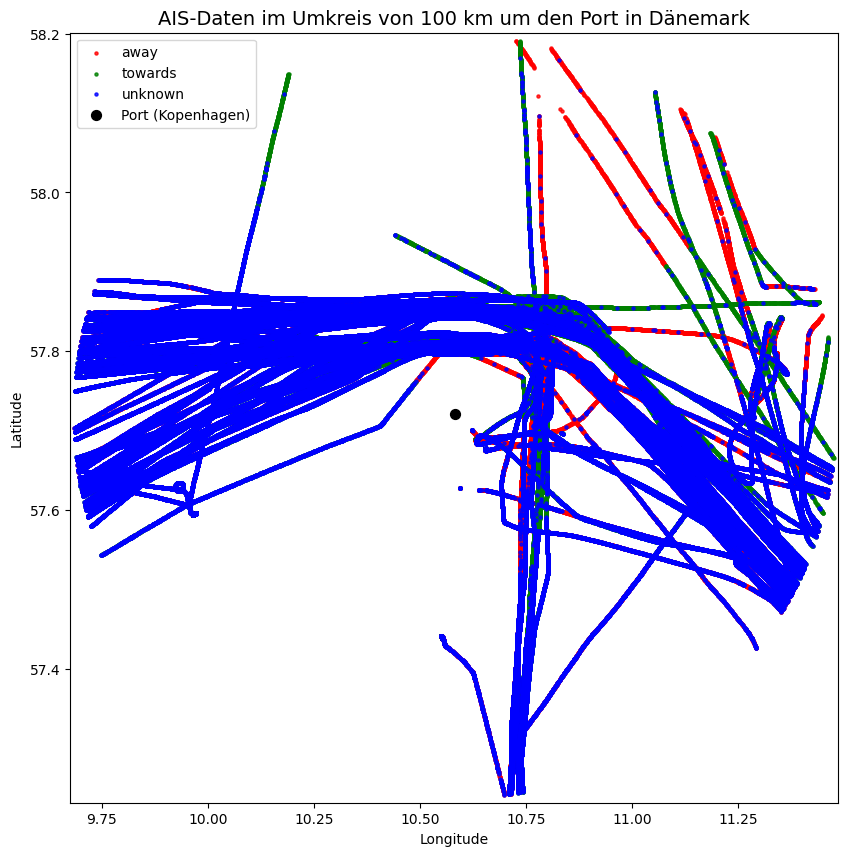

2025-04-10 17:59:25,646 - INFO - AIS-Datenverarbeitung abgeschlossen.


In [5]:
import sys
import logging
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Logging-Konfiguration: INFO-Level
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Parameter
radius_km = 100               # Suchradius in km
radius_m = radius_km * 1000  # Umrechnung in Meter
max_ships = None             # Maximale Anzahl der Schiffe, die zufällig ausgewählt werden sollen (None = alle)

logging.info("Starte AIS-Datenverarbeitung")

# --- 1. AIS-Daten einlesen und vorbereiten ---
try:
    df = pd.read_csv('aisdk-2024-03-01.csv')
    logging.info("CSV-Datei erfolgreich eingelesen.")
except Exception as e:
    logging.error("Fehler beim Einlesen der CSV-Datei: %s", e)
    sys.exit(1)

# Sicherstellen, dass die Spalte 'MMSI' vorhanden ist und gültige Werte enthält
if 'MMSI' not in df.columns:
    logging.error("Die Spalte 'MMSI' fehlt in der CSV-Datei.")
    sys.exit(1)

df = df.dropna(subset=['MMSI'])
df['MMSI'] = df['MMSI'].astype(str)  # Konvertierung in String, falls MMSI numerisch vorliegt

# --- Filter: Navigational status einschränken ---
if 'Navigational status' in df.columns:
    df = df[df['Navigational status'] == "Under way using engine"]
    logging.info("Datensatz wurde auf 'Navigational status' == 'Under way using engine' eingeschränkt.")
else:
    logging.warning("Die Spalte 'Navigational status' fehlt. Kein Filter wird angewendet.")

# --- Filter: Type of mobile einschränken (nur 'Class A' und 'Class B') ---
if 'Type of mobile' in df.columns:
    df = df[df['Type of mobile'].isin(["Class A", "Class B"])]
    logging.info("Datensatz wurde auf 'Type of mobile' in ['Class A', 'Class B'] eingeschränkt.")
else:
    logging.warning("Die Spalte 'Type of mobile' fehlt. Kein Filter wird angewendet.")

# --- Filter: Ship type einschränken (nur 'Cargo') ---
if 'Ship type' in df.columns:
    df = df[df['Ship type'] == "Cargo"]
    logging.info("Datensatz wurde auf 'Ship type' == 'Cargo' eingeschränkt.")
else:
    logging.warning("Die Spalte 'Ship type' fehlt. Kein Filter wird angewendet.")

# Falls vorhanden, den Zeitstempel konvertieren und sortieren (hier: '# Timestamp')
if '# Timestamp' in df.columns:
    df['# Timestamp'] = pd.to_datetime(df['# Timestamp'])
    df.sort_values(by=['MMSI', '# Timestamp'], inplace=True)
    logging.info("Die Spalte '# Timestamp' wurde konvertiert und die Daten wurden sortiert.")
else:
    logging.warning("Die Spalte '# Timestamp' fehlt. Klassifizierung der Bewegungsrichtung wird nicht durchgeführt.")

# Gesamtanzahl der einzigartigen Schiffe ermitteln
unique_ships = df['MMSI'].unique()
logging.info("Anzahl einzigartiger Schiffe (MMSI): %d", len(unique_ships))

# Zufällige Auswahl der Schiffe, sofern max_ships definiert ist
if max_ships is not None and len(unique_ships) > max_ships:
    sampled_ships = np.random.choice(unique_ships, size=max_ships, replace=False)
    logging.info("Zufällig ausgewählte Anzahl Schiffe: %d", len(sampled_ships))
else:
    sampled_ships = unique_ships
    logging.info("Alle Schiffe werden genutzt.")

# Filtern des Datensatzes: nur Zeilen zu den ausgewählten Schiffen
df = df[df['MMSI'].isin(sampled_ships)]
logging.info("Anzahl Zeilen in den ausgewählten Schiffstrajektorien: %d", df.shape[0])

# Nur Zeilen mit gültigen Latitude- und Longitude-Werten berücksichtigen
df = df.dropna(subset=['Latitude', 'Longitude'])
logging.info("Anzahl Zeilen mit gültigen Koordinaten: %d", len(df))

# Erstellen eines GeoDataFrames im CRS EPSG:4326 (Dezimalgrad: lat/lon)
gdf = gpd.GeoDataFrame(
    df,
    geometry=df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1),
    crs="EPSG:4326"
)
logging.info("GeoDataFrame in EPSG:4326 erstellt.")

# --- 2. Port-Koordinate in Dänemark definieren (Beispiel: Kopenhagen: ca. 55.68° N, 12.57° E) ---
port_lat = 57.72057859001703
port_lon = 10.582482140862185

port_point = Point(port_lon, port_lat)
gdf_port = gpd.GeoDataFrame({'geometry': [port_point]}, crs="EPSG:4326")
logging.info("Port-Koordinate (Kopenhagen) definiert.")

# --- 3. Transformation in metrisches CRS (EPSG:3857) zur Distanzberechnung ---
gdf_metric = gdf.to_crs(epsg=3857)
gdf_port_metric = gdf_port.to_crs(epsg=3857)
logging.info("Transformation in das metrische CRS (EPSG:3857) abgeschlossen.")

# --- 4. Berechnung der Distanz und Klassifizierung der Bewegungsrichtung ---
gdf_metric['dist_to_port'] = gdf_metric.geometry.distance(gdf_port_metric.geometry.iloc[0])
logging.info("Distanz zum Port berechnet.")

# Klassifizierung der Bewegungsrichtung basierend auf dem Delta der Distanz:
# Es wird ausschließlich 'towards' (Abstand verringert sich) oder 'away' (Abstand vergrößert sich) klassifiziert;
# bei fehlenden oder gleichen Werten wird 'unknown' vergeben.
if '# Timestamp' in gdf_metric.columns:
    gdf_metric = gdf_metric.sort_values(by=['MMSI', '# Timestamp'])
    gdf_metric['delta_distance'] = gdf_metric.groupby('MMSI')['dist_to_port'].diff()
    gdf_metric['direction'] = gdf_metric['delta_distance'].apply(
        lambda x: 'towards' if pd.notnull(x) and x < 0 else ('away' if pd.notnull(x) and x > 0 else 'unknown')
    )
    logging.info("Klassifizierung der Bewegungsrichtung durchgeführt.")
else:
    logging.warning("Keine '# Timestamp'-Spalte vorhanden, Klassifizierung der Bewegungsrichtung nicht möglich.")
    gdf_metric['direction'] = 'unknown'

# Filterung der AIS-Punkte, die sich im Umkreis des Ports befinden
gdf_within_metric = gdf_metric[gdf_metric['dist_to_port'] <= radius_m]
logging.info("Anzahl der AIS-Punkte im Umkreis von %d km: %d", radius_km, len(gdf_within_metric))

# --- 5. Rücktransformation in EPSG:4326 für das Plotten (Latitude/Longitude) ---
gdf_within = gdf_within_metric.to_crs(epsg=4326)
gdf_port_4326 = gdf_port  # Bereits in EPSG:4326
logging.info("Rücktransformation in EPSG:4326 abgeschlossen.")

# --- 6. Plot erstellen (ohne Hintergrundkarte) ---
# Definition der Farben je nach Bewegungsrichtung (keine Kategorie "stationary")
colors = {
    'towards': 'green',
    'away': 'red',
    'unknown': 'blue'
}

fig, ax = plt.subplots(figsize=(10, 10))
# Plotten der AIS-Punkte gruppiert nach Bewegungsrichtung
for direction, group in gdf_within.groupby('direction'):
    group.plot(ax=ax, color=colors.get(direction, 'blue'), markersize=5, alpha=0.8, label=direction)

# Plotten des Port-Punktes
gdf_port_4326.plot(ax=ax, color='black', markersize=50, label="Port (Kopenhagen)")

ax.set_title(f"AIS-Daten im Umkreis von {radius_km} km um den Port in Dänemark", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Optional: Achsenbereich anhand der gefilterten Daten (mit einem kleinen Puffer)
minx, miny, maxx, maxy = gdf_within.total_bounds
padding = 0.01  # Puffer in Grad
ax.set_xlim(minx - padding, maxx + padding)
ax.set_ylim(miny - padding, maxy + padding)

# Plot speichern und anzeigen
plt.savefig("ais_near_port_dk_latlon.png", dpi=300, bbox_inches='tight')
logging.info("Plot wurde erstellt und als 'ais_near_port_dk_latlon.png' gespeichert.")
plt.show()

logging.info("AIS-Datenverarbeitung abgeschlossen.")




In [ ]:
#osmium tags-filter /Users/ilyaskaracabey/Desktop/Enviroments/AIS/denmark-latest.osm.pbf n/seamark: -o seamarks.osm --overwrite

In [2]:
import geopandas as gpd

points = gpd.read_file("denmark_points.geojson", layer="points")


DataSourceError: denmark_points.geojson: No such file or directory

In [12]:
points

,osm_id,name,barrier,highway,is_in,place,ref,man_made,other_tags,geometry
0,115728,None,None,crossing,None,None,None,None,"""crossing:island""=>""no"",""crossing:markings""=>""...",POINT (9.13092 55.73457)
1,115732,None,None,crossing,None,None,None,None,"""crossing""=>""uncontrolled"",""crossing:island""=>...",POINT (9.13361 55.73391)
2,115733,None,None,traffic_signals,None,None,None,None,None,POINT (9.13383 55.73391)
3,115740,None,None,crossing,None,None,None,None,"""button_operated""=>""yes"",""crossing""=>""traffic_...",POINT (9.13158 55.73548)
4,115844,None,None,None,None,None,None,None,"""traffic_calming""=>""hump""",POINT (9.10172 55.72555)
...,...,...,...,...,...,...,...,...,...,...
3386660,12745337602,None,None,None,None,None,None,None,"""addr:city""=>""Ringsted"",""addr:country""=>""DK"",""...",POINT (11.80094 55.45561)
3386661,12745340801,None,None,None,None,None,None,None,"""addr:city""=>""Ringsted"",""addr:country""=>""DK"",""...",POINT (11.80333 55.45542)
3386662,12745340901,None,None,None,None,None,None,None,"""addr:city""=>""Ringsted"",""addr:country""=>""DK"",""...",POINT (11.80287 55.45545)
3386663,12745341001,None,None,None,None,None,None,None,"""addr:city""=>""Ringsted"",""addr:country""=>""DK"",""...",POINT (11.80373 55.45538)


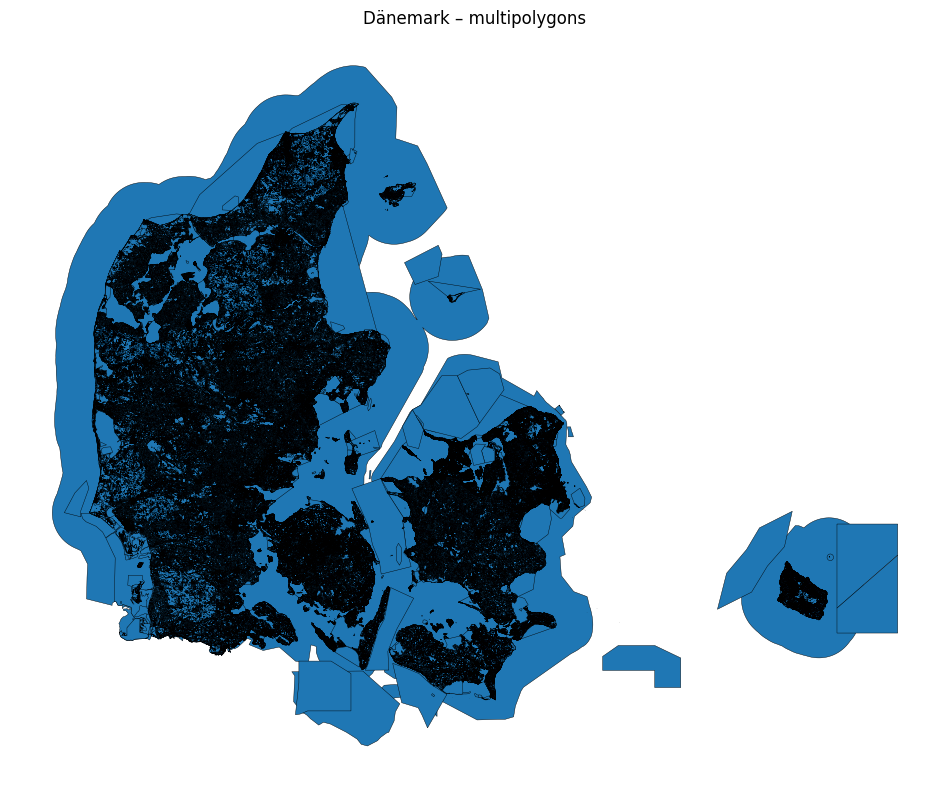

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Pfad zur GeoPackage-Datei
path = "denmark.gpkg"

# Liste der Layer in der Datei (z. B. aus ogrinfo)
layers = ["points", "lines", "multilinestrings", "multipolygons"]

# Optional: Nur ein Layer – z. B. multipolygons (Gebäude, Wasser, Flächen etc.)
gdf = gpd.read_file(path, layer="multipolygons")

# Plotten
gdf.plot(figsize=(12, 12), linewidth=0.3, edgecolor="black")
plt.title("Dänemark – multipolygons")
plt.axis("off")
plt.show()

# Plot Fehmarnbelt

In [15]:
from shapely.geometry import Point
import geopandas as gpd

# Fehmarnbelt-Zentrum als Punkt
center = Point(10.4, 55.4)

# GeoDataFrame mit WGS84 (EPSG:4326)
gdf_center = gpd.GeoDataFrame(geometry=[center], crs="EPSG:4326")

# In Meter-Projektion umrechnen für Puffer-Berechnung
gdf_center = gdf_center.to_crs("EPSG:3857")

# Puffer erzeugen: 100 km = 100_000 Meter
buffer = gdf_center.buffer(100_000)

# Zurück nach WGS84
buffer_wgs84 = gpd.GeoDataFrame(geometry=buffer, crs="EPSG:3857").to_crs("EPSG:4326")

In [16]:
# multipolygons = Flächen wie Gebäude, Parks, Wasser
multipolygons = gpd.read_file("denmark.gpkg", layer="multipolygons")

# Auf gleichen CRS bringen
multipolygons = multipolygons.to_crs("EPSG:4326")

# Zuschneiden mit dem 100km-Puffer
clipped = gpd.clip(multipolygons, buffer_wgs84)

KeyboardInterrupt: 

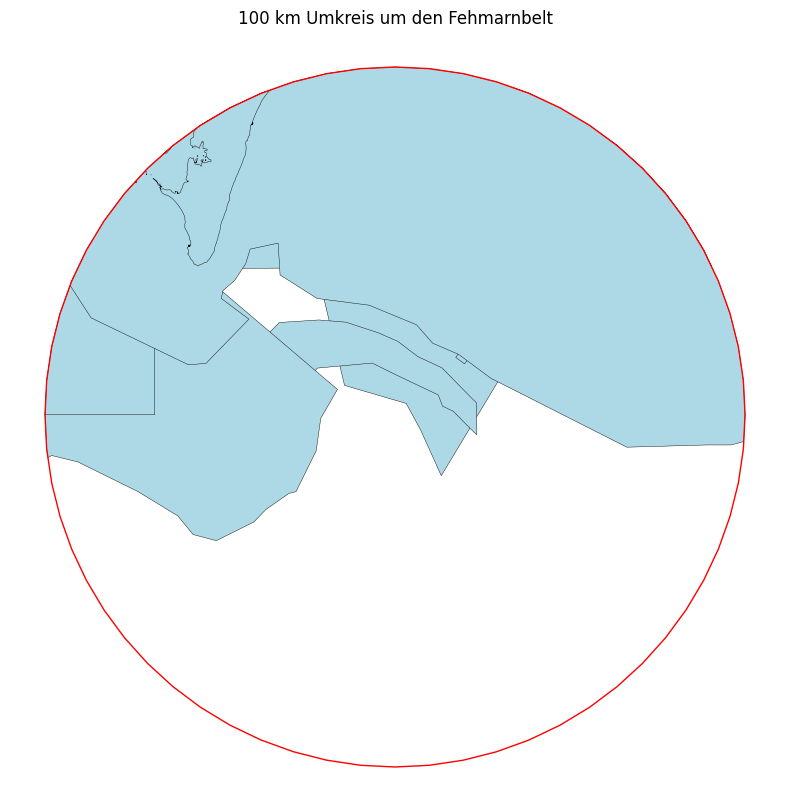

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
clipped.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.3)
buffer_wgs84.boundary.plot(ax=ax, color="red", linewidth=1)
plt.title("100 km Umkreis um den Fehmarnbelt")
plt.axis("off")
plt.show()